# Fit Varshni dei picchi reference

In [43]:
from picchi import raccoglitore_1 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=0', 'ass=1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo i due picchi e il loro errore

In [44]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [45]:

for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_picchi_sx  = []
        arr_err_picchi_sx  = []
        arr_picchi_dx  = []
        arr_err_picchi_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            if len(raccoglitore_1[ass][emi][i]['Regione 1']) > 0:
                picco_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][0]
                err_picco_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][1]
                #print(i)
            else:
                #print('#'+str(i))
                picco_sx, err_picco_sx = 0, 0
                
            if len(raccoglitore_1[ass][emi][i]['Regione 2']) > 0:
                
                picco_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][0]
                err_picco_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][1]
            else:
                picco_dx, err_picco_dx = 0, 0
               
            # conversione dei nm in eV degli errori
            err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
            err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)
            
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx)
            arr_err_picchi_sx.append(err_picco_sx)
            arr_picchi_dx.append(picco_dx)
            arr_err_picchi_dx.append(err_picco_dx)    
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_picchi_sx)
        data[ass][emi].append(arr_err_picchi_sx)
        data[ass][emi].append(arr_picchi_dx)
        data[ass][emi].append(arr_err_picchi_dx)
                        

## Plot e fit

Per ciascuna key [ass][emi] l'obiettivo è plottare due curve su ciascun grafico, ognuna delle quali è associata a uno dei due picchi. Quidni per ogni intensità si ha 1 grafico con 2 curve, ciascuna fittata con Varshni

In [46]:
arr_e_0_sx, arr_e_0_dx = [], []
arr_err_e_0_sx, arr_err_e_0_dx = [], []

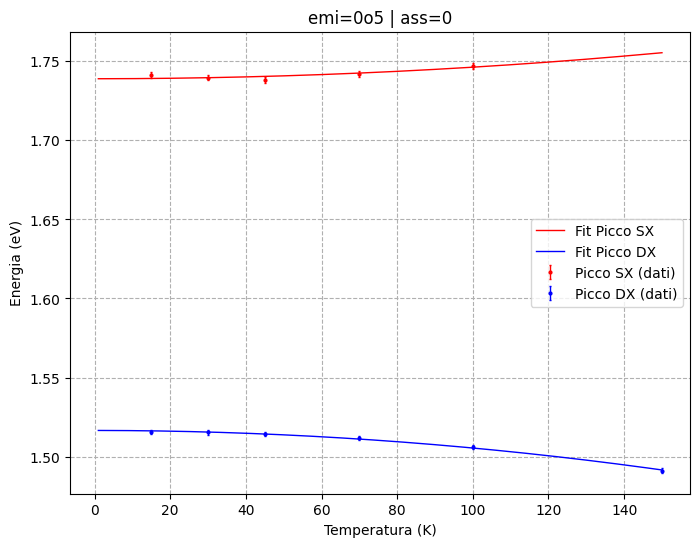

Parametri fit picco SX:
E_0 = 1.7389490258175089 ± 0.0011664311605780854 ; alpha = -16.020309441882244 ± 5.0560644146459275 ; beta = 21910090.680249017 ± 3.6968950418612955e-06
• Chi quadro: 3.256
• Gradi di libertà: 2
• Chi quadro ridotto: 1.628
• p-value: 1.964e-01
Parametri fit picco DX:
E_0 = 1.5165574199709286 ± 0.0007505352005360494 ; alpha = 165.3734732165577 ± 10.655062214580429 ; beta = 148926036.2599238 ± 1.1831796223441843e-05
• Chi quadro: 0.933
• Gradi di libertà: 3
• Chi quadro ridotto: 0.311
• p-value: 8.174e-01


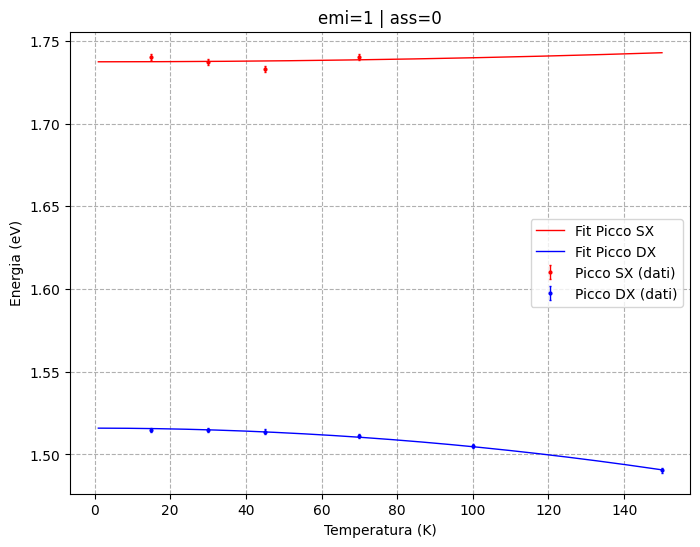

Parametri fit picco SX:
E_0 = 1.737328950251752 ± 0.0014981325652972414 ; alpha = -0.2329403212166509 ± 15125.53905649453 ; beta = 956063.4813758294 ± 62084722048.68468
• Chi quadro: 10.470
• Gradi di libertà: 1
• Chi quadro ridotto: 10.470
• p-value: 1.213e-03
Parametri fit picco DX:
E_0 = 1.5159096999066353 ± 0.0007498649785584891 ; alpha = 219.90721355498266 ± 14.026438252929907 ; beta = 196257678.36931586 ± 1.5716648407878947e-05
• Chi quadro: 0.930
• Gradi di libertà: 3
• Chi quadro ridotto: 0.310
• p-value: 8.181e-01


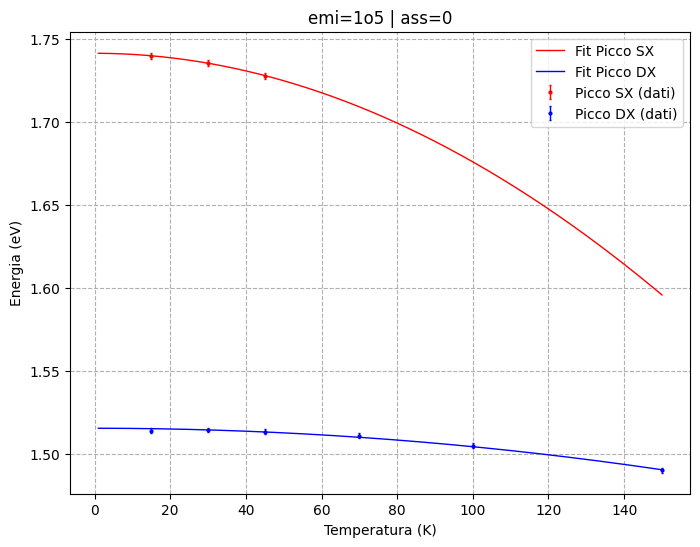

Parametri fit picco SX:
E_0 = 1.7414897349184901 ± 0.0033840553425332166 ; alpha = 0.02958071063340412 ± 4.825678573119089 ; beta = 4419.950026703299 ± 729159.0349321706
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5155103828238414 ± 0.0007494682341275027 ; alpha = 68.8272226208461 ± 4.422858920878886 ; beta = 61911225.875602074 ± 4.916915414319886e-06
• Chi quadro: 1.441
• Gradi di libertà: 3
• Chi quadro ridotto: 0.480
• p-value: 6.960e-01


/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_63951/3950946698.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


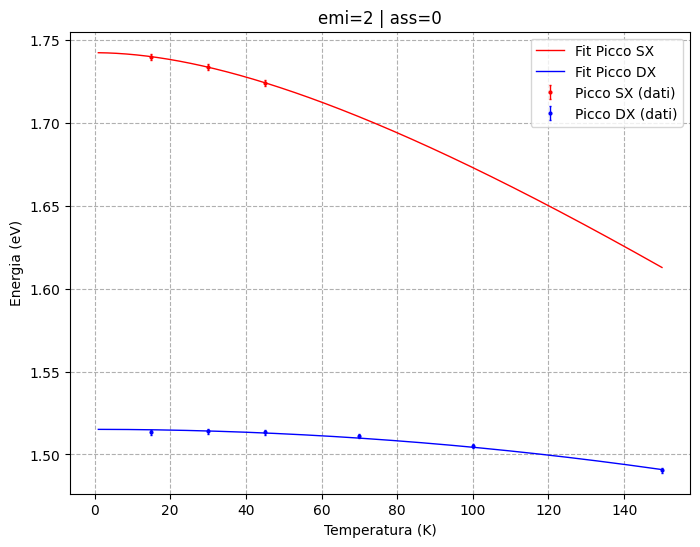

Parametri fit picco SX:
E_0 = 1.7423752036579072 ± 0.0038501828902600395 ; alpha = 0.0016999277843855883 ± 0.007675224650754356 ; beta = 145.20040743057658 ± 887.2001884847163
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.515127175826225 ± 0.0007491478584908274 ; alpha = 116.2082085999902 ± 7.697304724436675 ; beta = 107740017.00606988 ± 8.302295123047432e-06
• Chi quadro: 2.398
• Gradi di libertà: 3
• Chi quadro ridotto: 0.799
• p-value: 4.939e-01


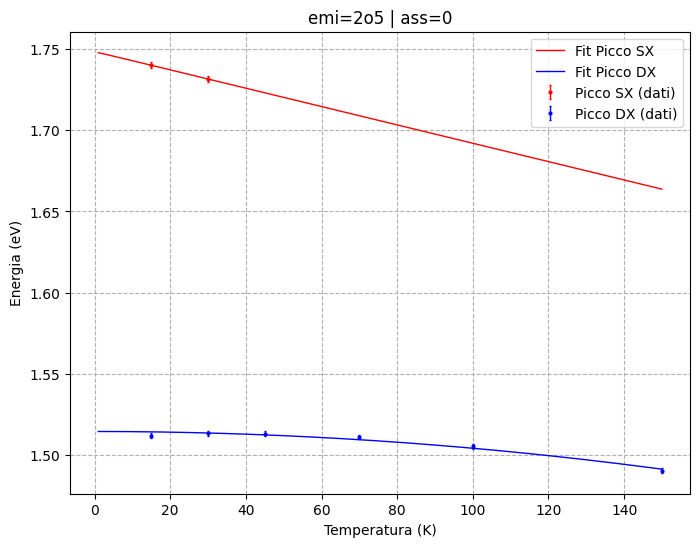

Parametri fit picco SX:
E_0 = 1.7480067670032986 ± 0.003965127135510412 ; alpha = 0.0005651457060752692 ± 0.00017226969837093502 ; beta = 0.8422874187131807 ± 1.9032050509092796e-06
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5145151077700252 ± 0.0007485709031929903 ; alpha = 80.33139619559448 ± 5.560793575966674 ; beta = 77848518.99001487 ± 5.738140770812374e-06
• Chi quadro: 5.693
• Gradi di libertà: 3
• Chi quadro ridotto: 1.898
• p-value: 1.275e-01


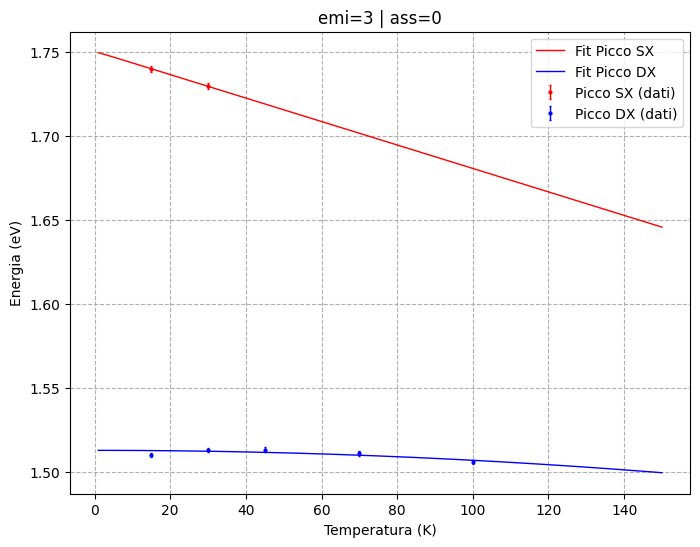

Parametri fit picco SX:
E_0 = 1.7497865513840787 ± 0.003961840731805684 ; alpha = 0.000698595848218667 ± 0.00017205544415952858 ; beta = 0.8499475811022954 ± 2.3472746024537097e-06
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5126984953511724 ± 0.0008793936576053032 ; alpha = 6.270617740447709 ± 1.8249044731108581 ; beta = 10587969.661939159 ± 1.0807704830308304e-06
• Chi quadro: 6.761
• Gradi di libertà: 2
• Chi quadro ridotto: 3.380
• p-value: 3.404e-02


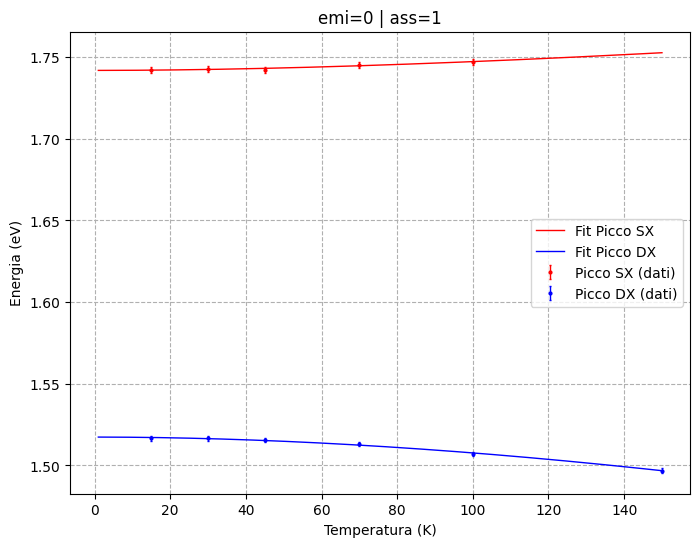

Parametri fit picco SX:
E_0 = 1.741821614807756 ± 0.0018446437670934283 ; alpha = -0.00022526019461290814 ± 0.0022605638684176843 ; beta = 318.2757089288703 ± 4244.336824181328
• Chi quadro: 0.447
• Gradi di libertà: 2
• Chi quadro ridotto: 0.223
• p-value: 7.998e-01
Parametri fit picco DX:
E_0 = 1.517342331012038 ± 0.0010674011990145043 ; alpha = 0.0008124378535241456 ± 0.0021249980610696826 ; beta = 738.2560178361473 ± 2331.983987430762
• Chi quadro: 0.530
• Gradi di libertà: 3
• Chi quadro ridotto: 0.177
• p-value: 9.122e-01


In [47]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        err_y1 = data[ass][emi][1]
        
        # picco dx
        y2 = data[ass][emi][2]
        err_y2 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
        
        err_x = 1 # errore di 1 K sulla temperatura
        
        # Fit del primo picco - Parametri iniziali?
        popt1, pcov1 = curve_fit(varshni, x1, y1, sigma=err_y1, absolute_sigma=True, p0=[x1[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Fit del secondo picco
        popt2, pcov2 = curve_fit(varshni, x2, y2, sigma=err_y2, absolute_sigma=True, p0=[x2[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Errori sui parametri
        perr1 = np.sqrt(np.diag(pcov1))  # Errori per il primo picco
        perr2 = np.sqrt(np.diag(pcov2))  # Errori per il secondo picco

        
        # Creazione del grafico
        x_fit = np.linspace(1, 150, 500)  # Creazione di un intervallo continuo per il grafico

        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco e del suo fit
        plt.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX (dati)', markersize=2, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label='Fit Picco SX')

        # Plot del secondo picco e del suo fit
        plt.errorbar(x2, y2, yerr=err_y2, fmt='bo', label='Picco DX (dati)', markersize=2, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt2), 'b-', linewidth=1, label='Fit Picco DX')

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()
        
        # Analisi fit
        ## Residui del picco SX
        residui1 = y1 - varshni(x1, *popt1)
        chi2_1 = np.sum((residui1 / err_y1) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl1 = len(y1) - len(popt1)

        # Chi quadro ridotto
        chi2_ridotto1 = chi2_1 / gdl1
        
        # valore p
        p_value1 = 1 - chi2.cdf(chi2_1, gdl1)
        
        ## Residui del picco DX
        residui2 = y2 - varshni(x2, *popt2)
        chi2_2 = np.sum((residui2 / err_y2) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl2 = len(y2) - len(popt2)

        # Chi quadro ridotto
        chi2_ridotto2 = chi2_2 / gdl2
        
        # valore p
        p_value2 = 1 - chi2.cdf(chi2_2, gdl2)
        
        # Stampa dei risultati
        print("Parametri fit picco SX:")
        print("E_0 =", popt1[0], '±', perr1[0], "; alpha =", popt1[1], '±', perr1[1], "; beta =", popt1[2], '±', perr1[2])
        print(f"• Chi quadro: {chi2_1:.3f}")
        print(f"• Gradi di libertà: {gdl1}")
        print(f"• Chi quadro ridotto: {chi2_ridotto1:.3f}")
        print(f"• p-value: {p_value1:.3e}")       
        print("Parametri fit picco DX:")
        print("E_0 =", popt2[0], '±', perr2[0], "; alpha =", popt2[1], '±', perr2[1], "; beta =", popt2[2], '±', perr2[2])
        print(f"• Chi quadro: {chi2_2:.3f}")
        print(f"• Gradi di libertà: {gdl2}")
        print(f"• Chi quadro ridotto: {chi2_ridotto2:.3f}")
        print(f"• p-value: {p_value2:.3e}")  
        
        arr_e_0_sx.append(popt1[0])
        arr_e_0_dx.append(popt2[0])
        arr_err_e_0_sx.append(perr1[0])
        arr_err_e_0_dx.append(perr2[0])

### Stampa E_0

In [48]:
np.set_printoptions(legacy='1.25')

#### E_0 ricavati da Picco SX

In [49]:
arr_e_0_sx

[1.7389490258175089,
 1.737328950251752,
 1.7414897349184901,
 1.7423752036579072,
 1.7480067670032986,
 1.7497865513840787,
 1.741821614807756]

#### Errori E_0 SX

In [50]:
arr_err_e_0_sx

[0.0011664311605780854,
 0.0014981325652972414,
 0.0033840553425332166,
 0.0038501828902600395,
 0.003965127135510412,
 0.003961840731805684,
 0.0018446437670934283]

#### E_0 ricavati da Picco DX

In [51]:
arr_e_0_dx

[1.5165574199709286,
 1.5159096999066353,
 1.5155103828238414,
 1.515127175826225,
 1.5145151077700252,
 1.5126984953511724,
 1.517342331012038]

#### Errori E_0 DX

In [52]:
arr_err_e_0_dx

[0.0007505352005360494,
 0.0007498649785584891,
 0.0007494682341275027,
 0.0007491478584908274,
 0.0007485709031929903,
 0.0008793936576053032,
 0.0010674011990145043]

Provo a calcolare il chi-quadro di questi valori; il residuo sarà la distanza dalla media pesata. N-1 gradi di libertà. (N=6)

In [53]:
# media pesata
m_p_sx = media_pesata(arr_e_0_sx, arr_err_e_0_sx)
err_m_p_sx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_sx)**2))
m_p_dx = media_pesata(arr_e_0_dx, arr_err_e_0_dx)
err_m_p_dx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_dx)**2))
print('medie pesate: sx=', m_p_sx, '| dx=', m_p_dx)

# la media pesata non è un valore esatto
# Errore totale considerando anche l'errore sulla media
sigma_tot_sx = np.sqrt(np.array(arr_err_e_0_sx)**2 + err_m_p_sx**2)
sigma_tot_dx = np.sqrt(np.array(arr_err_e_0_dx)**2 + err_m_p_dx**2)

# residui
residui_sx = arr_e_0_sx - m_p_sx
chi2_sx = np.sum( (residui_sx / sigma_tot_sx) ** 2)
residui_dx = arr_e_0_dx - m_p_dx
chi2_dx = np.sum( (residui_dx / sigma_tot_sx) ** 2)

# chi quadro ridotti
chi2_rid_sx = chi2_sx / (len(arr_e_0_sx)-1)
chi2_rid_dx = chi2_dx / (len(arr_e_0_dx)-1)

medie pesate: sx= 1.739997648367748 | dx= 1.515337120407251


In [54]:
print('chi2 ridotto SX =', chi2_rid_sx)
print('chi2 ridotto DX =', chi2_rid_dx)

chi2 ridotto SX = 2.3865809234462385
chi2 ridotto DX = 0.39588670934420406
